# Explorando Dígitos Escritos à Mão

In [1]:
%matplotlib inline

In [2]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

(1797, 8, 8)

1797 amostras. Cada amostra é composta por uma grade de 8 por 8 pixels, tons de cinza.

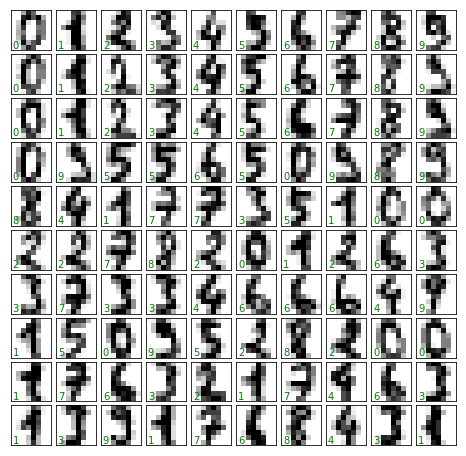

In [3]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(10, 10, figsize=(8, 8),
subplot_kw={'xticks':[], 'yticks':[]},gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
transform=ax.transAxes, color='green')

Os dados terão serão transformados em um array unidimensional com 64 pixels de comprimento representando cada dígito. Também é necessário o vetor target que fornece a tag determinada anteriormente para cada dígito.

In [4]:
X = digits.data
X.shape

(1797, 64)

In [5]:
y = digits.target
y.shape

(1797,)

### Aprendizagem não supervisionada: Redução da dimensionalidade 

Reduzindo os dados para duas dimensões para facilitar a visualização.

In [7]:
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)
data_projected.shape

(1797, 2)

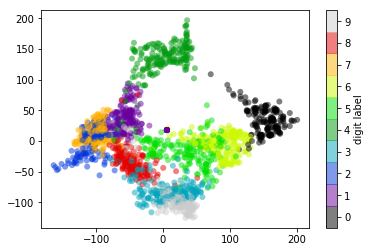

In [8]:
#plotando os dados

plt.scatter(data_projected[:, 0], data_projected[:, 1], c=digits.target,
edgecolor='none', alpha=0.5,cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5);

Algumas percepções a partir deste gráfico:

Os números 0 e 1 tem pouca sobreposição no resultado;

Entre 1 e 4 há uma sobreposição, assim como entre o 8 e o 3...

## Separando os dados em conjuntos de treinamento e teste e ajustando um modelo

In [9]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)

In [10]:
#fazendo a previsão

from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

In [11]:
# verificando a acuráca do modelo - validando a precisão.

from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.8333333333333334

## Plotando a matriz de confusão para verificar onde estão os erros da previsão

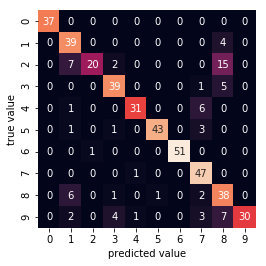

In [12]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ytest, y_model)

sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

Analisando alguns resultados:

Existem 15 números 2 sendo previstos como 8 e 7 sendo previstos como 1;

Existem 7 números 9 sendo previstos como 8...

## Plotando os números novamente com marcações de erros

Números verdes são acertos e números vermelhos previsões erradas.

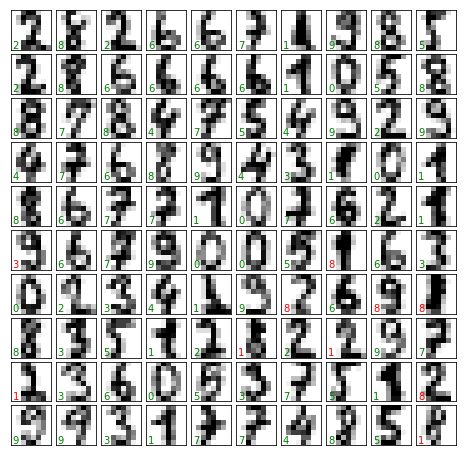

In [13]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
subplot_kw={'xticks':[], 'yticks':[]},gridspec_kw=dict(hspace=0.1, wspace=0.1))
test_images = Xtest.reshape(-1, 8, 8)

for i, ax in enumerate(axes.flat):
    ax.imshow(test_images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(y_model[i]),
transform=ax.transAxes,color='green' if (ytest[i] == y_model[i]) else 'red')

## Prevendo com o modelo Support Vector Machines - mais sofisticado.

In [14]:
from sklearn import svm

In [15]:
clf = svm.SVC(gamma='scale')
clf.fit(X, y)  

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [18]:
y_model_clf = clf.predict(Xtest)

In [19]:
accuracy_score(ytest, y_model_clf)

1.0

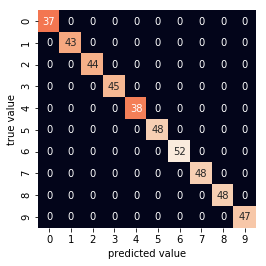

In [20]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ytest, y_model_clf)

sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

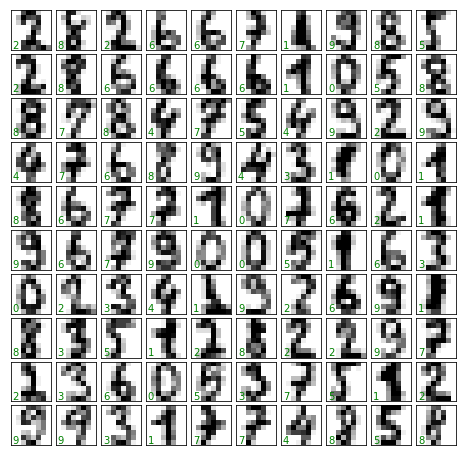

In [21]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
subplot_kw={'xticks':[], 'yticks':[]},gridspec_kw=dict(hspace=0.1, wspace=0.1))
test_images = Xtest.reshape(-1, 8, 8)

for i, ax in enumerate(axes.flat):
    ax.imshow(test_images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(y_model_clf[i]),
transform=ax.transAxes,color='green' if (ytest[i] == y_model_clf[i]) else 'red')

Resultado com esse modelo é de 100% de acertos.